# Mikerograd Demo

Hi! Thanks for checking out this Julia library!

This library is based on Andrej Karpathy's Micrograd (which is in Python), and has a similar goal: to provide basic gradient-tracking, with code **simple enough to read** and **easy enough to edit and customize.** 

Like the original Python Micrograd, we'll be using a *Value* class for scalar-based gradient tracking. 

In addition, I've also added a *Tensor* class for array/matrix-based gradient tracking. Even though this wasn't included in the original Micrograd, I decided to add it so we could do simple examples like MNIST without the code taking forever.

I'm hoping that this will be a useful resource for people who are just getting started with Julia and trying to learn the basics. 

## Setup and Import

Right now there's no fancy installation with a package manager or anything. You need to actually download the *mikerograd.jl* file form this repo, put it somewhere on your computer, and then direct Julia to it's location in order to use it. Like this, but replace the location with its location on your computer:

In [26]:
push!(LOAD_PATH, "/Users/mikesaint-antoine/Desktop/mikerograd_folder") 
# change this to the location of the folder where mikerograd.jl is on your computer

using mikerograd

## *Value* Class

There are two types of objects in mikerograd: *Values* and *Tensors*. Let's try out some examples with *Values* first. 

Here's how you define one:

In [27]:
x = Value(4.0);

println(x)

Value(4.0)


*Value* objects can store numbers, perform operations, and automatically track the gradients of the outputs.

Here's how you take a look at the number a *Value* is storing, and it's gradient:

In [28]:
println(x.data) # the number, which is 4 in this case

4.0


In [29]:
println(x.grad) # the gradient, which is 0 for now, but will be automatically tracked as we do operations

0.0


Next let's try an operation. We'll define another *Value* called **y**, add it to **x**, and save the result as **z**

In [30]:
y = Value(3.0);
z = x + y;

println(z)

Value(7.0)


Pretty simple so far, right? But here's the cool part -- we can now do a backward pass to calculate the derivative of **z** with respect to **x** and **y**. Here's how we do that:

In [31]:
backward(z)

Now, the **grad** fields of **x** and **y** are populated, and will tell us the derivative of **z** with respect to each of the inputs **x** and **y**.


In [32]:
println(x.grad) # dz/dx = 1, meaning an increase of 1 in x will lead to an increase of 1 in z.

1.0


In [33]:
println(y.grad) # dy/dx = 1, meaning an increase of 1 in y will lead to an increase of 1 in z.

1.0


Pretty cool, right? So that's the basic functionality of the *Value* class. You can store store numbers, do operations, and track the derivative of the output with respect to all of the inputs. This allows you to, for example, minimize a loss function through gradient-descent.

Here's a list of the operations currently supported:
* **Addition**
* **Subtraction**
* **Multiplication**
* **Division**
* **Exponents**
* **e^x**
* **log()**
* **tanh()**

These are basically the same as in Karpathy's Python Micrograd, and basically implemented the same way. Let's test a couple of them out. We've already done addition, so let's try subtraction.

In [34]:
# subtraction
x = Value(10.0);
y = Value(3.0);
z = x - y;

println(z)

Value(7.0)


If you want, you can try **backward(z)**, and you should be able to find **x.grad** = *dz/dx* = 1 and **y.grad** = *dz/dy* = -1. But I'll skip over that for now.

Next let's try multiplication.

In [35]:
# multiplication
x = Value(6.0);
y = Value(2.0);
z = x * y;

println(z)

Value(12.0)


And again, we can get the derivative with of **z** with respect to **x** and **y**.

In [36]:
# backward pass for multiplication
backward(z)
println(x.grad) # dz/dx = y = 2
println(y.grad) # dz/dy = x = 6

2.0
6.0


Alright, so far so good! Let's try division now...

In [37]:
# division
x = Value(15.0);
y = Value(5.0);
z = x / y;

println(z)

Value(3.0)


In [38]:
# backward pass for division
backward(z)
println(x.grad) # dz/dx = 1/5 = 0.2
println(y.grad) # dz/dy = -15 / x^2 = -0.6

0.2
-0.6


Ok, now let's try exponents. **NOTE:** just as in the original Micrograd, the exponents here must be an int or float, NOT a *Value* object. Might work on fixing this later.

In [39]:
# exponents
x = Value(5.0);
y = 2; # NOTE - exponent can't be Value, must be int or float
z = x^y;

println(z)

Value(25.0)


In [40]:
# backward pass for exponent
backward(z)
println(x.grad) # dz/dx = 2x = 10

10.0


Ok, now for the exponential function e^x, which we will call **exp()**.

In [41]:
# e^x
x = Value(2.0);
z = exp(x);

println(z)

Value(7.38905609893065)


In [42]:
# backward pass for e^x
backward(z)
println(x.grad) # dz/dx = e^x = (same thing we got for above)

7.38905609893065


Ok, now for the natural logarithm, which we call **log()**.

In [43]:
# natural log
x = Value(10.0);
z = log(x);

println(z)

Value(2.302585092994046)


In [44]:
# backward pass for natural log
backward(z)
println(x.grad) # dz/dx = 1/x = 0.1

0.1


Lastly, the **tanh()** function. Personally my trig is pretty rusty and I don't use this function very often, but I'm including it because it was in the original Micrograd. I think Karpathy included it to use as a possible activation function for a linear layer of neurons, to add nonlinearity and bound the layer outputs on [-1, 1].

In [45]:
# tanh()
x = Value(3.0);
z = tanh(x);

println(z)

Value(0.9950547536867305)


In [46]:
# backward pass for tanh()
backward(z)
println(x.grad) # dz/dx = 1 - tanh^2(x) = ????

0.009866037165440211


So far these examples have been pretty simple. But as long as we're using these simple functions, we can combine them in pretty complicated ways. The gradients can still be calculated for all the inputs, using backpropagation and the chain rule of derivatives.

Let's try out a complicated example to see this...

In [47]:
input1 = Value(2.3);
input2 = Value(-3.5);
input3 = Value(3.9);

weight1 = Value(-0.8);
weight2 = Value(1.8);
weight3 = Value(3.0);

bias = Value(-3.2);

y_pred = tanh(input1*weight1 + input2*weight2 + input3*weight3 + bias);
y_true = Value(0.8);

loss = (y_pred - y_true)^2;

println(loss)

Value(0.20683027474728832)


Here we're using 3 inputs, 3 weights, a bias, and a tanh() activation function to come up with some prediction in a regression problem, and calculating a loss by comparing it to the target value.

Even though this looks pretty complicated, we can still use **backward(loss)** to calculate the derivative of the loss with respect to everything.

In [48]:
backward(loss)

println(weight1.grad) # dloss/dweight1
println(weight2.grad) # dloss/dweight2
println(weight3.grad) # dloss/dweight3
println(bias.grad) # dloss/dbias

# if you wanted, you could also see the derivatives of the loss with respect to the inputs, y_pred, or y_true
# although in a typically neural net situation, those variables would not be updated in the gradient descent

-1.8427042527651991
2.80411516725139
-3.12458547208012
-0.8011757620718257


## Linear Regression Example

Let's try using the *Value* class to fit a line to data, using gradient descent.

First, we'll make up some fake data of two things that are linearly related.


In [49]:
heights = Float64[]
for count in 1:79
    push!(heights, rand(40:90))
end


# TRUE PARAMS y = m*x + b
m = 2
b = 10



skills = Float64[]

for height in heights
    skill = m * height + b + randn() * 7.0
    push!(skills, skill)
end

Just for fun, I'll add myself to this dataset. I'm 72 inches tall, and extremely bad at basketball lol

In [50]:
push!(heights, 72);
push!(skills, 75);

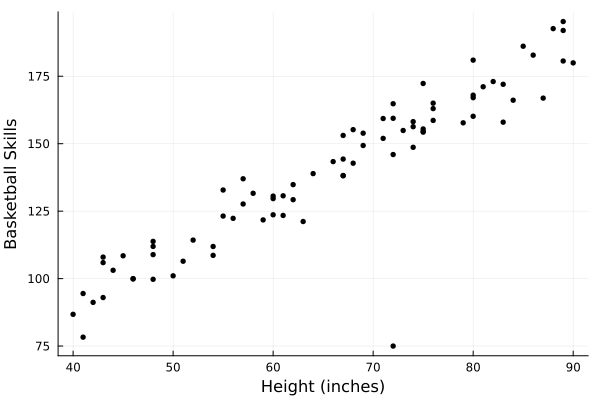

In [51]:
using Plots
scatter(heights, skills, legend=false, markersize=3, color=:black, xlabel="Height (inches)", ylabel="Basketball Skills")


Ok, now let's see if we can use the *Value* class to fit a line to this data.

In [52]:
heights = [Value(item) for item in heights];
skills = [Value(item) for item in skills];

In [53]:
lr = 0.000002;
runs = 100000;

# initial guesses to start with
m_guess = Value(0);
b_guess = Value(0);

In [54]:

for run in 1:runs

    m_guess.grad = 0
    b_guess.grad = 0

    global loss = Value(0)

    for i in 1:length(heights)

        skill_pred = heights[i] * m_guess + b_guess
        loss_to_add = (skill_pred - skills[i])^2
        global loss += loss_to_add
    end

    
    backward(loss)

    m_guess.data -= m_guess.grad * lr
    b_guess.data -= b_guess.grad * lr

    if run % 5000 == 0
        println("Run: $run, loss: $(round(loss.data[1], digits=3))")
    end

end

Run: 5000, loss: 10603.234
Run: 10000, loss: 10506.304
Run: 15000, loss: 10422.305
Run: 20000, loss: 10349.512
Run: 25000, loss: 10286.43
Run: 30000, loss: 10231.763
Run: 35000, loss: 10184.388
Run: 40000, loss: 10143.334
Run: 45000, loss: 10107.757
Run: 50000, loss: 10076.925
Run: 55000, loss: 10050.207
Run: 60000, loss: 10027.053
Run: 65000, loss: 10006.988
Run: 70000, loss: 9989.6
Run: 75000, loss: 9974.531
Run: 80000, loss: 9961.473
Run: 85000, loss: 9950.156
Run: 90000, loss: 9940.35
Run: 95000, loss: 9931.851
Run: 100000, loss: 9924.487


Let's see where our guesses for *m* and *b* are at now.

In [55]:
println("m guess:")
println(m_guess)
println()
println("b guess:")
println(b_guess)
println()

m guess:
Value(1.9461732519991672)

b guess:
Value(11.678150914111233)



Pretty close to the real values that we originally used to make the data!

We can also plot the fit line with these *m* and *b* parameters.

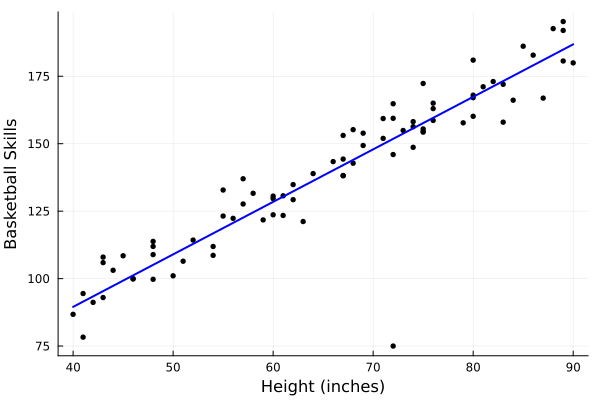

In [56]:
heights_data = [item.data for item in heights] # remember heights is full of Values, so need to do this to get the numbers

x_line = minimum(heights_data):maximum(heights_data)
y_line = m_guess.data * x_line .+ b_guess.data
plot!(x_line, y_line, linewidth=2, color=:blue)

## *Tensor* Class

The *Value* class from the original Micrograd is a great tool for understanding how backpropagation works and implementing gradient descent for simple problems like linear regression. Unfortunately though, it's far too slow to use for even simple neural net problems. 

In [57]:
x = Tensor([2.0, 3.0, 4.0]);
println(x)

Tensor([2.0, 3.0, 4.0])


In [58]:
println(x.data)
println(x.grad)

[2.0, 3.0, 4.0]
[0.0, 0.0, 0.0]


Right now the *Tensor* class pretty much has the bare minimum needed to implement a simple neural network. Here's a list of the operations currently supported:
* **Addition**
* **Matrix Multiplication / Dot Product**
* **Relu**
* **Softmax Activation / Cross Entropy Loss Combination**

Rather than testing out all of these individually, let's see if we can save some time by testing them all out at once:

In [59]:
# Tensor test -- attempting a forward pass of a simple neural net

# using Statistics
# using Random
# do we need these?

inputs = Tensor(rand(2, 3)); # Matrix with shape (2,3) -- 2 batches, 3 input features per batch
weights1 = Tensor(rand(3, 4)); # Matrix with shape (3,4) -- takes 3 inputs, has 4 neurons
weights2 = Tensor(rand( 4, 5)); # Matrix with shape (4,5) -- takes 4 inputs, has 5 neurons
biases1 = Tensor([1.0,1.0,1.0,1.0]); # Bias vector for first layer neurons
biases2 = Tensor([1.0,1.0,1.0,1.0,1.0]); # Bias vector for second layer neurons


layer1_out = relu(inputs * weights1 + biases1);

layer2_out = layer1_out * weights2 + biases2;


# important -- correct classes should be one-hot encoded and NOT a Tensor, just a regular matrix.
y_true = [0 1 0 0 0;
          0 0 0 1 0]

loss = softmax_crossentropy(layer2_out,y_true)



println(loss)

Tensor([2.772862491652698])


Now we can find the derivative of the loss with respect to the weights and biases (and inputs although that isn't as relevant).

In [60]:
backward(loss)

println("weights1 gradient:")
println(weights1.grad)
println()
println("weights2 gradient:")
println(weights2.grad)
println()
println("biases1 gradient:")
println(biases1.grad)
println()
println("biases2 gradient:")
println(biases2.grad)
println()

weights1 gradient:
[0.2046139944945961 0.06259033856722422 0.18014051031771425 0.19580987481080733; 0.3023857160856418 0.06410190525727334 0.2569977362860747 0.20150416592760986; 0.03262747014056489 0.030956250575071634 0.035535716906009956 0.09613149530872982]

weights2 gradient:
[0.29491376697246063 -0.669834256266387 0.9158760114617528 -0.5620247896575492 0.02106926748972288; 0.3012581140794484 -0.7328430185246376 0.9413700239919081 -0.5311004107462406 0.021315291199521726; 0.27457163943309776 -0.6577121571815677 0.8567632218716404 -0.4930933635020999 0.0194706593789294; 0.43242223910498856 -1.1153689932822788 1.3587925817358677 -0.7061709600845608 0.030325132525983227]

biases1 gradient:
[0.28099184813683264, 0.12557702222540204, 0.26024848733122136, 0.39151253569668143]

biases2 gradient:
[0.2062891295950838, -0.46191386432846915, 0.6398559534902084, -0.3989972169481475, 0.014765998191324356]



Pretty cool!

## MNIST Example

Lastly, let's try out a real neural net example -- solving the MNIST image classification problem.

You can download the MNIST data in CSV format here:
https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

First, we'll read in the training and testing data...

In [61]:
## read training data

X = []
y = []
global first_row = true
open("mnist_data/mnist_train.csv", "r") do file
    for line in eachline(file)

        if first_row  # Skip the first row
            global first_row = false
            continue
        end

        # Split the line by comma and strip whitespace
        row = parse.(Float64, strip.(split(line, ',')))

        push!(y, row[1])
        push!(X, row[2:length(row)])
    end
end

X= hcat(X...)';
X = X / 255.0;



## read testing data

X_test = []
y_test = []
global first_row = true
open("mnist_data/mnist_test.csv", "r") do file
    for line in eachline(file)

        if first_row  # Skip the first row
            global first_row = false
            continue
        end

        # Split the line by comma and strip whitespace
        row = parse.(Float64, strip.(split(line, ',')))

        push!(y_test, row[1])
        push!(X_test, row[2:length(row)])
    end
end

X_test = hcat(X_test...)';
X_test = X_test / 255.0;

Next, we define the model...

In [62]:
## define model

weights1 = Tensor(0.01 * rand(784, 128));
weights2 = Tensor(0.01 * rand(128, 10));

biases1 = Tensor(zeros(128));
biases2 = Tensor(zeros(10));


batch_size = 100;
num_classes = 10;  # total number of classes
lr = 0.1;
epochs = 2;

Now, we train the model...

In [63]:

global run = 1
for epoch in 1:epochs

    for i in 1:batch_size:size(X,1)


        ## get current batch
        batch_X = X[i:i+batch_size-1, :]
        batch_X = Tensor(batch_X)
        batch_y = y[i:i+batch_size-1]



        ## convert batch_y to one-hot
        batch_y_one_hot = zeros(batch_size,num_classes)
        for batch_ind in 1:batch_size
            batch_y_one_hot[batch_ind,Int.(batch_y)[batch_ind]+1] = 1
        end



        ## zero grads
        weights1.grad .= 0
        weights2.grad .= 0
        biases1.grad .= 0
        biases2.grad .= 0



        ## forward pass
        layer1_out = relu(batch_X * weights1 + biases1)
        layer2_out = layer1_out * weights2 + biases2
        loss = softmax_crossentropy(layer2_out,batch_y_one_hot)



        ## backward pass
        backward(loss)


        ## update params
        weights1.data -= weights1.grad .* lr
        weights2.data -= weights2.grad .* lr
        biases1.data -= biases1.grad .* lr
        biases2.data -= biases2.grad .* lr


        if run % 10 == 0
            println("Epoch: $epoch, run: $run, loss: $(round(loss.data[1], digits=3))")
        end
        
        global run += 1

    end
end


Epoch: 1, run: 10, loss: 2.296
Epoch: 1, run: 20, loss: 2.266
Epoch: 1, run: 30, loss: 2.291
Epoch: 1, run: 40, loss: 2.238
Epoch: 1, run: 50, loss: 2.159
Epoch: 1, run: 60, loss: 2.0
Epoch: 1, run: 70, loss: 1.73
Epoch: 1, run: 80, loss: 1.548
Epoch: 1, run: 90, loss: 1.299
Epoch: 1, run: 100, loss: 1.119
Epoch: 1, run: 110, loss: 1.073
Epoch: 1, run: 120, loss: 0.973
Epoch: 1, run: 130, loss: 0.953
Epoch: 1, run: 140, loss: 0.954
Epoch: 1, run: 150, loss: 0.777
Epoch: 1, run: 160, loss: 0.759
Epoch: 1, run: 170, loss: 0.832
Epoch: 1, run: 180, loss: 0.528
Epoch: 1, run: 190, loss: 0.507
Epoch: 1, run: 200, loss: 0.543
Epoch: 1, run: 210, loss: 0.756
Epoch: 1, run: 220, loss: 0.482
Epoch: 1, run: 230, loss: 0.415
Epoch: 1, run: 240, loss: 0.573
Epoch: 1, run: 250, loss: 0.627
Epoch: 1, run: 260, loss: 0.447
Epoch: 1, run: 270, loss: 0.388
Epoch: 1, run: 280, loss: 0.384
Epoch: 1, run: 290, loss: 0.382
Epoch: 1, run: 300, loss: 0.664
Epoch: 1, run: 310, loss: 0.451
Epoch: 1, run: 320, 

Finally, we check out performance on the testing set...

In [64]:
global correct = 0
global total = 0
for i in 1:length(y_test)
    X_in = X_test[i:i,:] ## need to keep this (1,784), not (784,)
    X_in = Tensor(X_in)
    y_true = y_test[i]

    layer1_out = relu(X_in * weights1 + biases1)
    layer2_out = layer1_out * weights2 + biases2


    pred_argmax = argmax(layer2_out.data, dims=2)[1][2]

    if pred_argmax-1 == y_true
        global correct +=1
    end
    global total += 1

end

println(correct/total)

0.9071
